## Insurance Claims- Fraud Detection

# Problem Definition

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Data Analysis

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Data Profiling

In [5]:
df.shape

(1000, 40)

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [8]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [11]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [12]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Preprocessing

In [13]:
df.drop("_c39",axis=1,inplace=True)

In [14]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [15]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Making DataFrame for the Nominal Data

In [16]:
df_visualization_nominal=df[['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported']].copy()

In [17]:
df_visualization_nominal.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

# Visualization of the Data:

In [18]:
import seaborn as sns

01-01-2006    3
05-08-1992    3
28-04-1992    3
07-12-1995    2
14-04-1992    2
             ..
20-08-1990    1
16-09-2009    1
18-10-2005    1
27-08-2014    1
20-01-2014    1
Name: policy_bind_date, Length: 951, dtype: int64


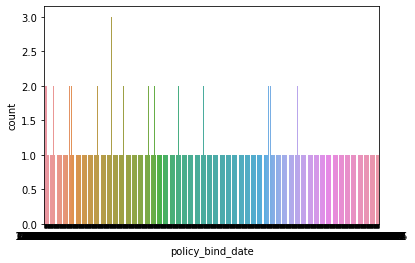

In [19]:
ax = sns.countplot(x="policy_bind_date", data=df_visualization_nominal)
print(df_visualization_nominal["policy_bind_date"].value_counts())

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


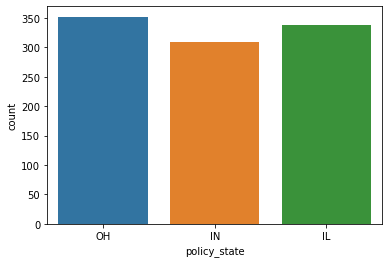

In [20]:
ax = sns.countplot(x="policy_state", data=df_visualization_nominal)
print(df_visualization_nominal["policy_state"].value_counts())

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


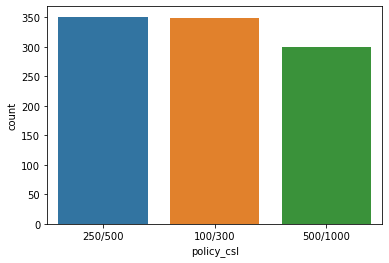

In [21]:
ax = sns.countplot(x="policy_csl", data=df_visualization_nominal)
print(df_visualization_nominal["policy_csl"].value_counts())

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


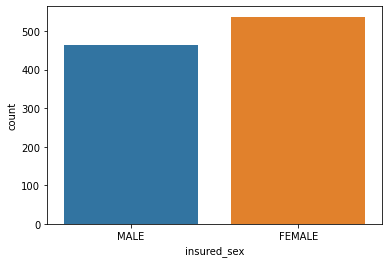

In [22]:
ax = sns.countplot(x="insured_sex", data=df_visualization_nominal)
print(df_visualization_nominal["insured_sex"].value_counts())

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


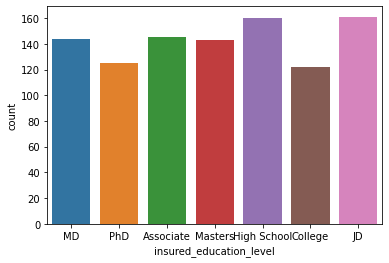

In [23]:
ax = sns.countplot(x="insured_education_level", data=df_visualization_nominal)
print(df_visualization_nominal["insured_education_level"].value_counts())

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


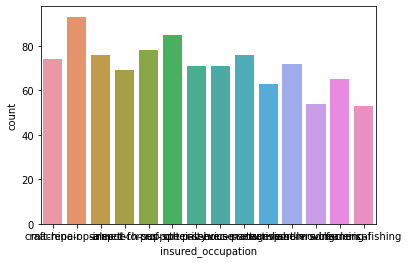

In [24]:
ax = sns.countplot(x="insured_occupation", data=df_visualization_nominal)
print(df_visualization_nominal["insured_occupation"].value_counts())

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


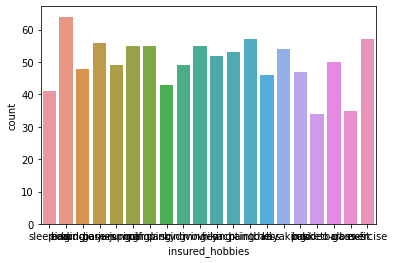

In [25]:
ax = sns.countplot(x="insured_hobbies", data=df_visualization_nominal)
print(df_visualization_nominal["insured_hobbies"].value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


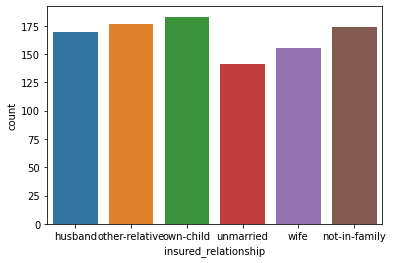

In [26]:
ax = sns.countplot(x="insured_relationship", data=df_visualization_nominal)
print(df_visualization_nominal["insured_relationship"].value_counts())

02-02-2015    28
17-02-2015    26
07-01-2015    25
04-02-2015    24
24-01-2015    24
10-01-2015    24
19-01-2015    23
08-01-2015    22
30-01-2015    21
13-01-2015    21
06-02-2015    20
31-01-2015    20
22-02-2015    20
12-02-2015    20
23-02-2015    19
14-01-2015    19
01-01-2015    19
21-01-2015    19
12-01-2015    19
21-02-2015    19
20-01-2015    18
25-02-2015    18
18-01-2015    18
28-02-2015    18
01-02-2015    18
03-01-2015    18
14-02-2015    18
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
06-01-2015    17
05-02-2015    16
16-02-2015    16
16-01-2015    16
15-02-2015    16
13-02-2015    16
15-01-2015    15
17-01-2015    15
28-01-2015    15
18-02-2015    15
22-01-2015    14
27-02-2015    14
20-02-2015    14
27-01-2015    13
09-02-2015    13
23-01-2015    13
03-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
02-01-2015    11
29-01-2015    11
19-02-2015    10
10-02-2015    10
11-02-2015    10
25-01-2015    10
07-02-2015    10
11-01-2015    

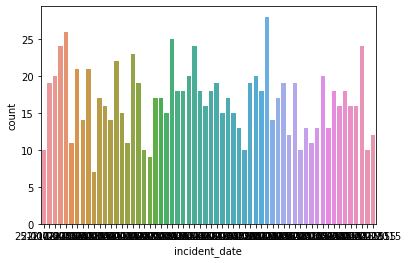

In [27]:
ax = sns.countplot(x="incident_date", data=df_visualization_nominal)
print(df_visualization_nominal["incident_date"].value_counts())

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


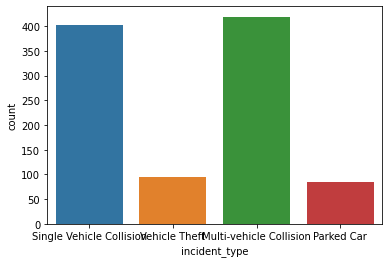

In [28]:
ax = sns.countplot(x="incident_type", data=df_visualization_nominal)
print(df_visualization_nominal["incident_type"].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


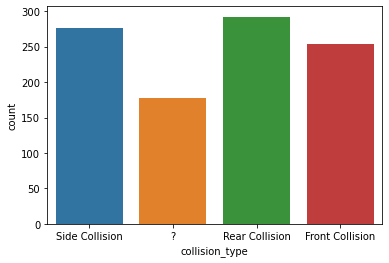

In [29]:
ax = sns.countplot(x="collision_type", data=df_visualization_nominal)
print(df_visualization_nominal["collision_type"].value_counts())

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


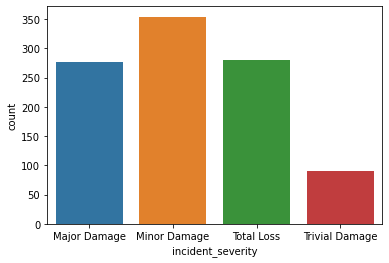

In [30]:
ax = sns.countplot(x="incident_severity", data=df_visualization_nominal)
print(df_visualization_nominal["incident_severity"].value_counts())

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


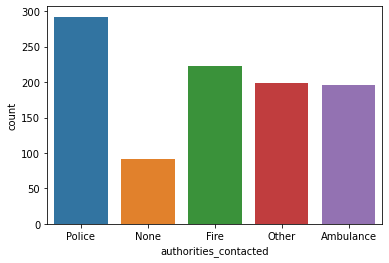

In [31]:
ax = sns.countplot(x="authorities_contacted", data=df_visualization_nominal)
print(df_visualization_nominal["authorities_contacted"].value_counts())

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


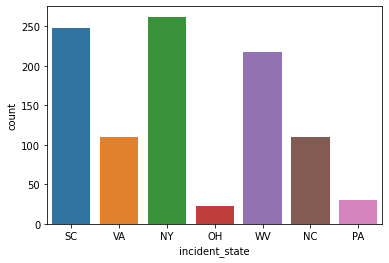

In [32]:
ax = sns.countplot(x="incident_state", data=df_visualization_nominal)
print(df_visualization_nominal["incident_state"].value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


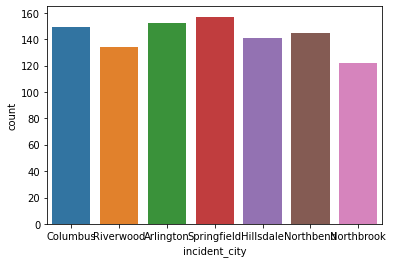

In [33]:
ax = sns.countplot(x="incident_city", data=df_visualization_nominal)
print(df_visualization_nominal["incident_city"].value_counts())

2711 Britain Ave      1
9214 Elm Ridge        1
7928 Maple Ridge      1
8973 Washington St    1
2823 Weaver Lane      1
                     ..
8701 5th Lane         1
3936 Tree Drive       1
4814 Lincoln Lane     1
5771 Best St          1
9639 Britain Ridge    1
Name: incident_location, Length: 1000, dtype: int64


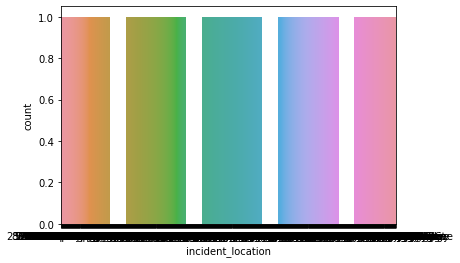

In [34]:
ax = sns.countplot(x="incident_location", data=df_visualization_nominal)
print(df_visualization_nominal["incident_location"].value_counts())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


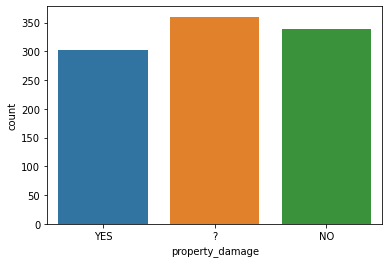

In [35]:
ax = sns.countplot(x="property_damage", data=df_visualization_nominal)
print(df_visualization_nominal["property_damage"].value_counts())

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


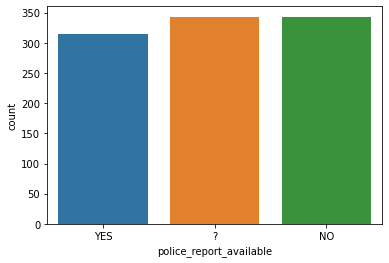

In [36]:
ax = sns.countplot(x="police_report_available", data=df_visualization_nominal)
print(df_visualization_nominal["police_report_available"].value_counts())

Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


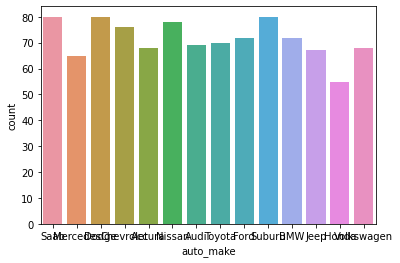

In [37]:
ax = sns.countplot(x="auto_make", data=df_visualization_nominal)
print(df_visualization_nominal["auto_make"].value_counts())

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Forrestor         28
92x               28
Camry             28
95                27
F150              27
E400              27
Grand Cherokee    25
93                25
Maxima            24
Escape            24
Tahoe             24
X5                23
Ultima            23
Civic             22
Highlander        22
Silverado         22
Fusion            21
CRV               20
Corolla           20
ML350             20
Impreza           20
TL                20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


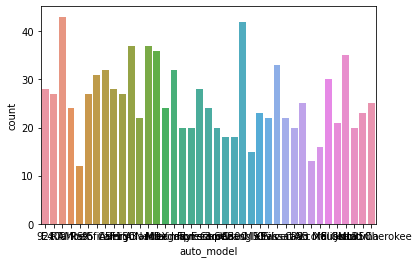

In [38]:
ax = sns.countplot(x="auto_model", data=df_visualization_nominal)
print(df_visualization_nominal["auto_model"].value_counts())

N    753
Y    247
Name: fraud_reported, dtype: int64


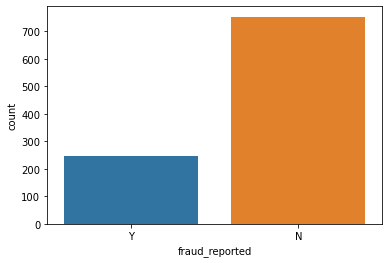

In [39]:
ax = sns.countplot(x="fraud_reported", data=df_visualization_nominal)
print(df_visualization_nominal["fraud_reported"].value_counts())

# Checking the distribution of the continous value of the float type columns

In [40]:
df_visualization_continous=df[["months_as_customer","age","policy_number","policy_deductable","policy_annual_premium","umbrella_limit","insured_zip","capital-gains","capital-loss","incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount","injury_claim","property_claim","vehicle_claim","auto_year"]]

In [41]:
df_visualization_continous.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

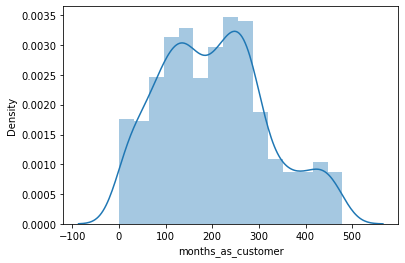

In [42]:
sns.distplot(df_visualization_continous['months_as_customer'],kde=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

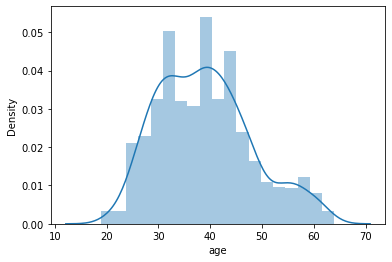

In [43]:
sns.distplot(df_visualization_continous['age'],kde=True)

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

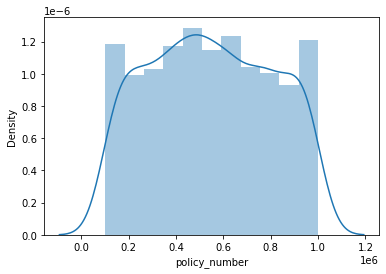

In [44]:
sns.distplot(df_visualization_continous['policy_number'],kde=True)

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

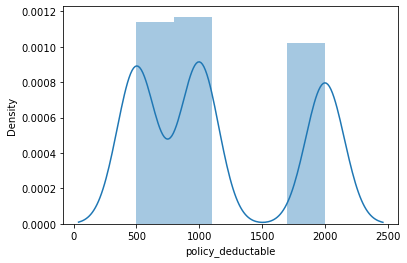

In [45]:
sns.distplot(df_visualization_continous['policy_deductable'],kde=True)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

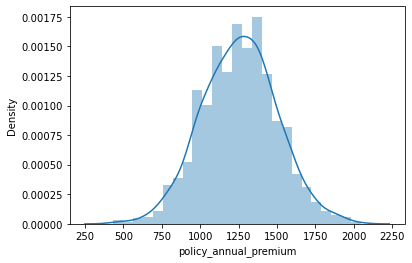

In [46]:
sns.distplot(df_visualization_continous['policy_annual_premium'],kde=True)

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

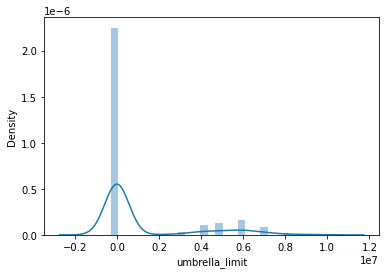

In [47]:
sns.distplot(df_visualization_continous['umbrella_limit'],kde=True)

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

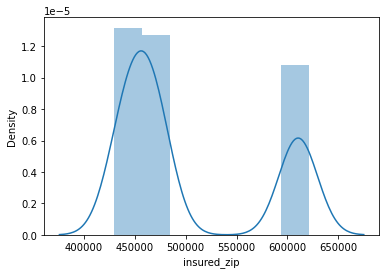

In [48]:
sns.distplot(df_visualization_continous['insured_zip'],kde=True)

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

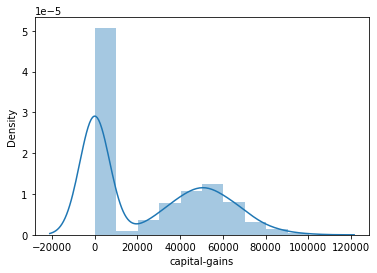

In [49]:
sns.distplot(df_visualization_continous['capital-gains'],kde=True)

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

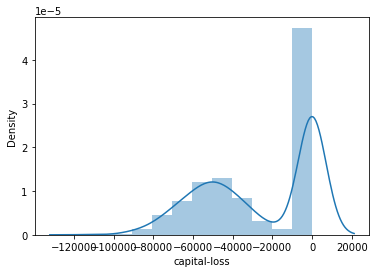

In [50]:
sns.distplot(df_visualization_continous['capital-loss'],kde=True)

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

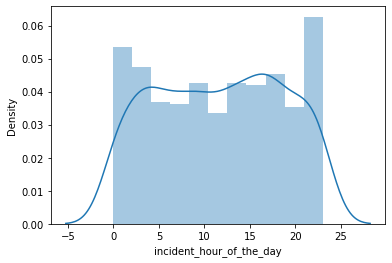

In [51]:
sns.distplot(df_visualization_continous['incident_hour_of_the_day'],kde=True)

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

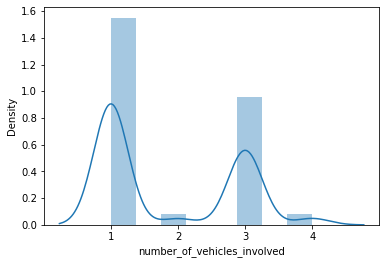

In [52]:
sns.distplot(df_visualization_continous['number_of_vehicles_involved'],kde=True)

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

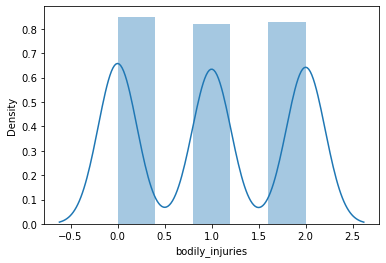

In [53]:
sns.distplot(df_visualization_continous['bodily_injuries'],kde=True)

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

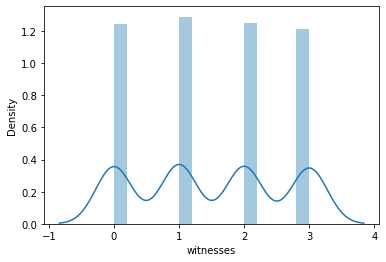

In [54]:
sns.distplot(df_visualization_continous['witnesses'],kde=True)

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

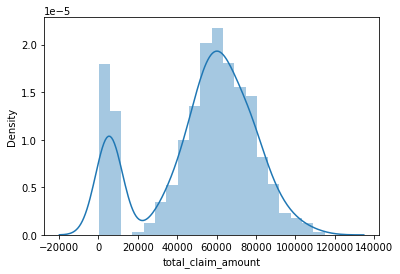

In [55]:
sns.distplot(df_visualization_continous['total_claim_amount'],kde=True)

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

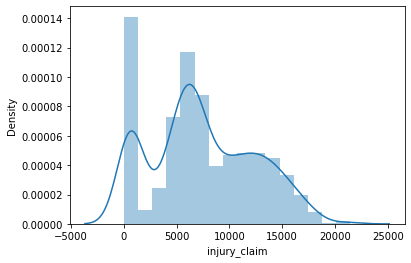

In [56]:
sns.distplot(df_visualization_continous['injury_claim'],kde=True)

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

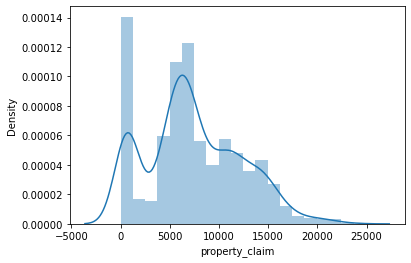

In [57]:
sns.distplot(df_visualization_continous['property_claim'],kde=True)

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

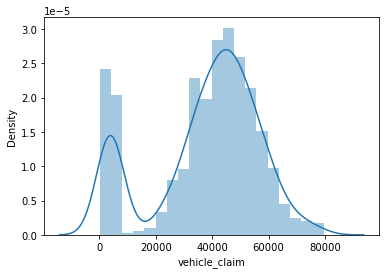

In [58]:
sns.distplot(df_visualization_continous['vehicle_claim'],kde=True)

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

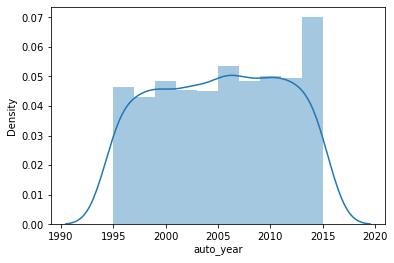

In [59]:
sns.distplot(df_visualization_continous['auto_year'],kde=True)

# Encoding of DataFrame:

In [60]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [61]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [62]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


# Describe the dataset:

In [63]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


<AxesSubplot:>

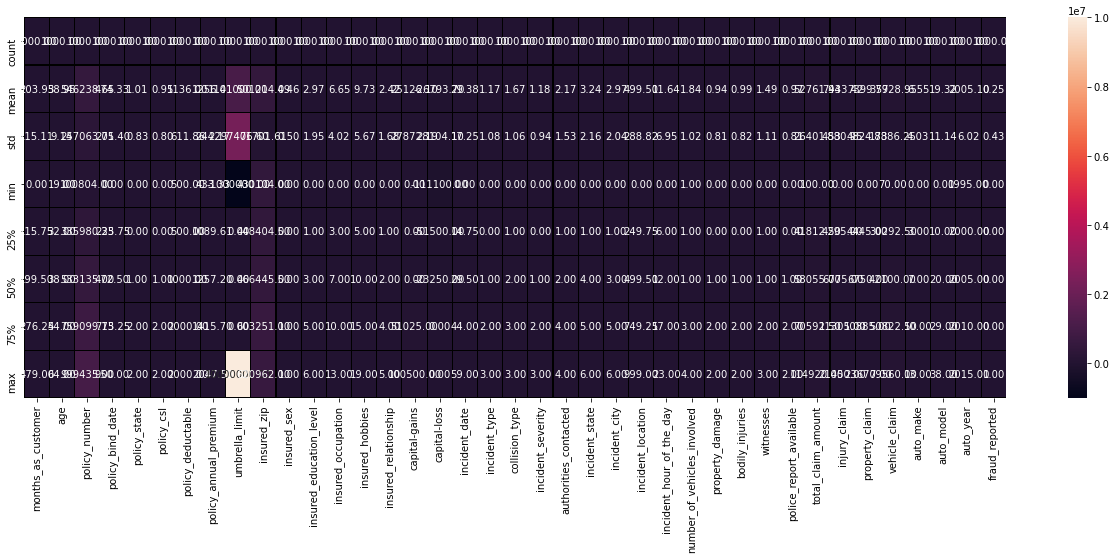

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation of the columns with the target columns:

In [65]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


<AxesSubplot:>

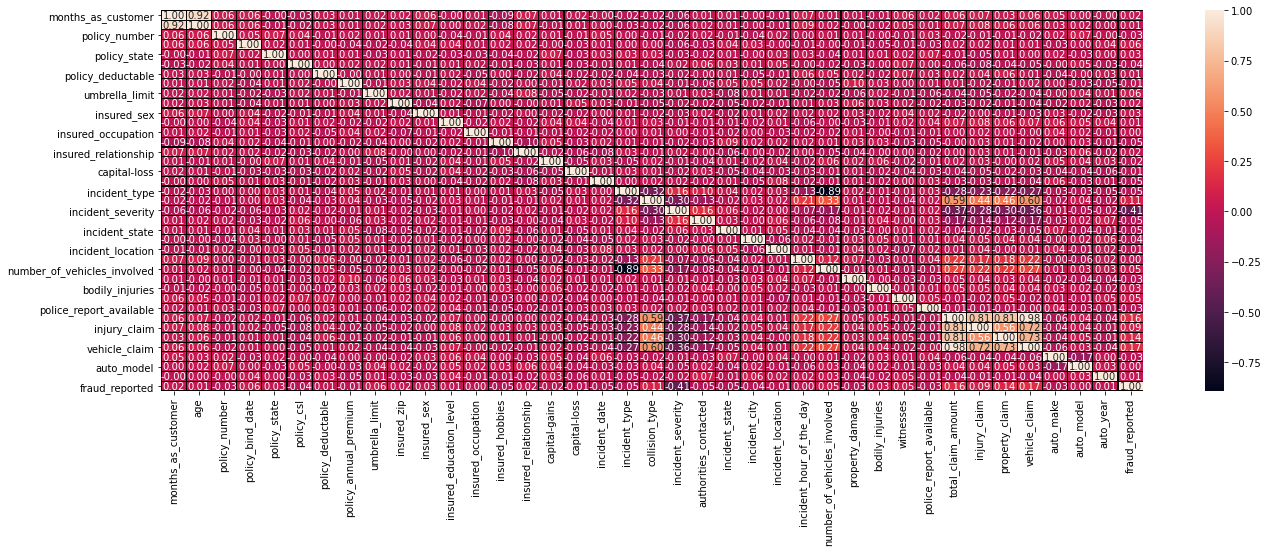

In [66]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

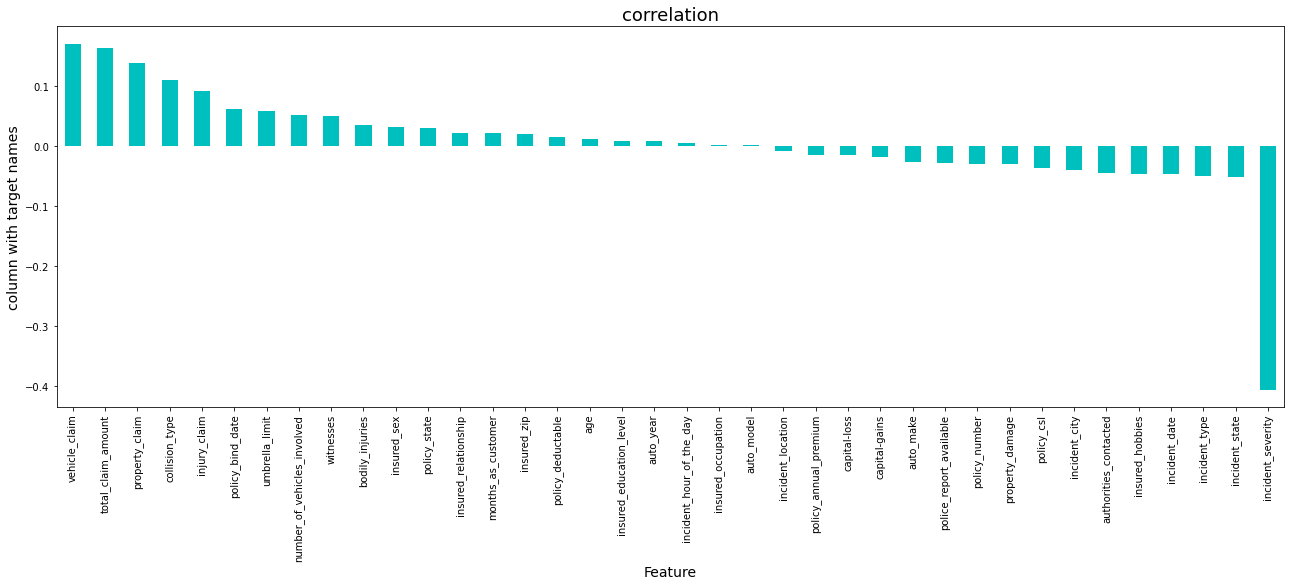

In [67]:
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [68]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


# Outliers Check:

In [69]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date               float64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_date                  float64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_location              float64
incident_hour_of_the_day 

<AxesSubplot:>

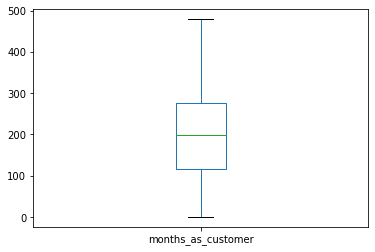

In [70]:
df['months_as_customer'].plot.box()

<AxesSubplot:>

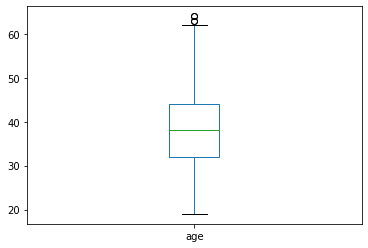

In [71]:
df['age'].plot.box()

<AxesSubplot:>

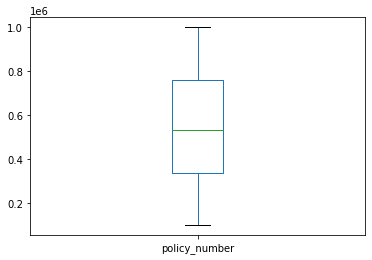

In [72]:
df['policy_number'].plot.box()

<AxesSubplot:>

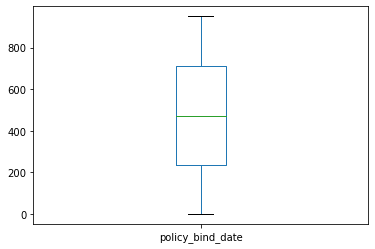

In [73]:
df['policy_bind_date'].plot.box()

<AxesSubplot:>

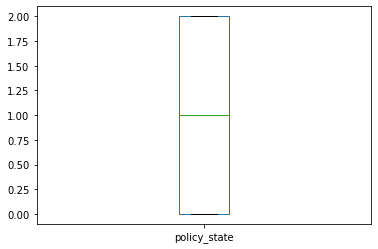

In [74]:
df['policy_state'].plot.box()

<AxesSubplot:>

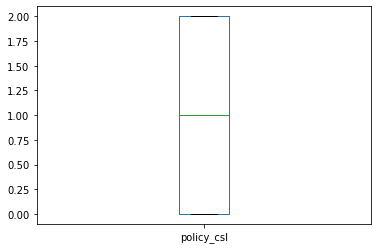

In [75]:
df['policy_csl'].plot.box()

<AxesSubplot:>

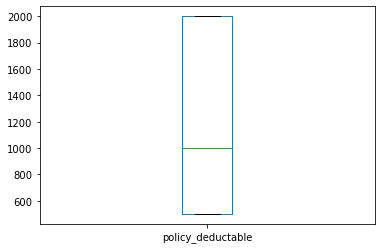

In [76]:
df['policy_deductable'].plot.box()

<AxesSubplot:>

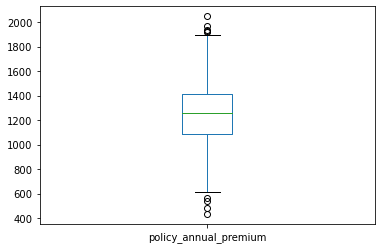

In [77]:
df['policy_annual_premium'].plot.box()

<AxesSubplot:>

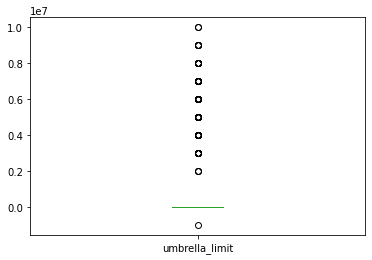

In [78]:
df['umbrella_limit'].plot.box()

<AxesSubplot:>

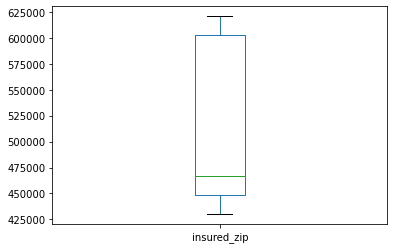

In [79]:
df['insured_zip'].plot.box()

<AxesSubplot:>

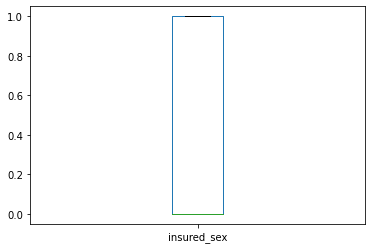

In [80]:
df['insured_sex'].plot.box()

<AxesSubplot:>

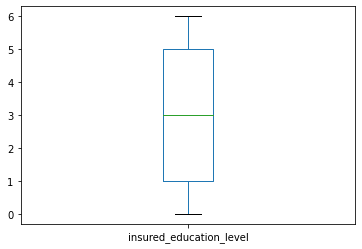

In [81]:
df['insured_education_level'].plot.box()

<AxesSubplot:>

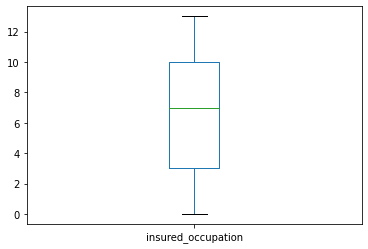

In [82]:
df['insured_occupation'].plot.box()

<AxesSubplot:>

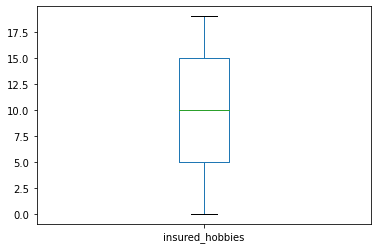

In [83]:
df['insured_hobbies'].plot.box()

<AxesSubplot:>

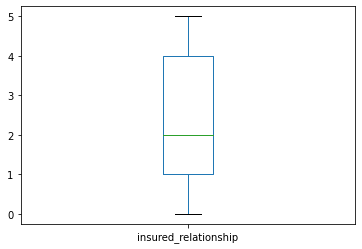

In [84]:
df['insured_relationship'].plot.box()

<AxesSubplot:>

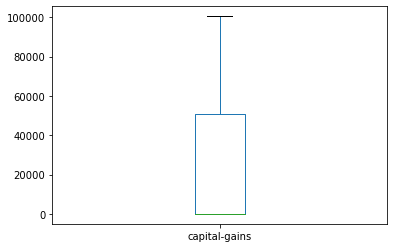

In [85]:
df['capital-gains'].plot.box()

<AxesSubplot:>

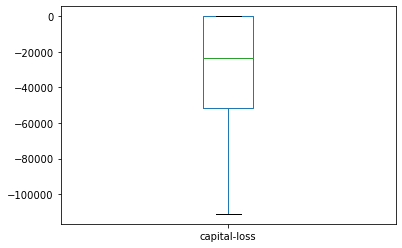

In [86]:
df['capital-loss'].plot.box()

<AxesSubplot:>

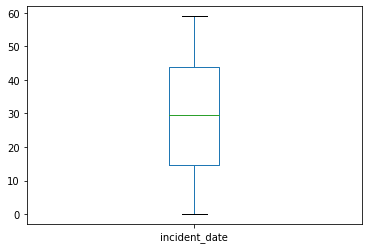

In [87]:
df['incident_date'].plot.box()

<AxesSubplot:>

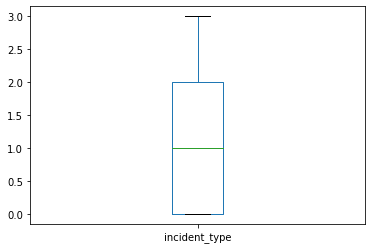

In [88]:
df['incident_type'].plot.box()

<AxesSubplot:>

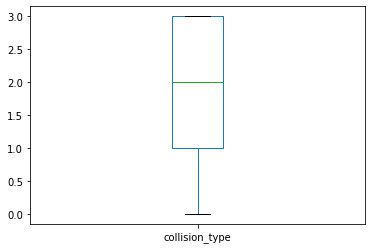

In [89]:
df['collision_type'].plot.box()

<AxesSubplot:>

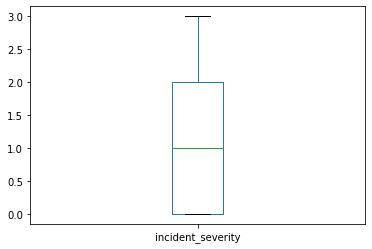

In [90]:
df['incident_severity'].plot.box()

<AxesSubplot:>

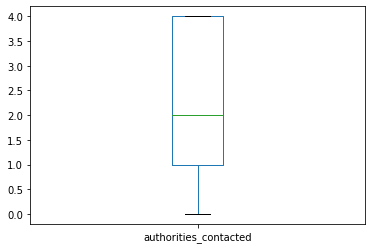

In [91]:
df['authorities_contacted'].plot.box()

<AxesSubplot:>

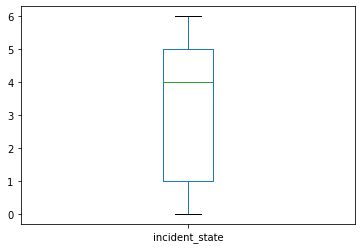

In [92]:
df['incident_state'].plot.box()

<AxesSubplot:>

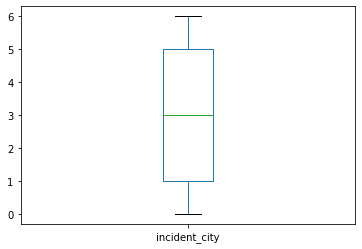

In [93]:
df['incident_city'].plot.box()

<AxesSubplot:>

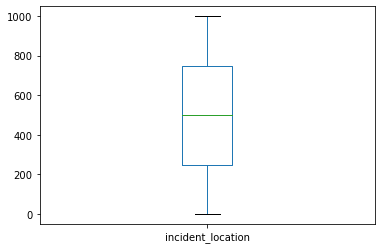

In [94]:
df['incident_location'].plot.box()

<AxesSubplot:>

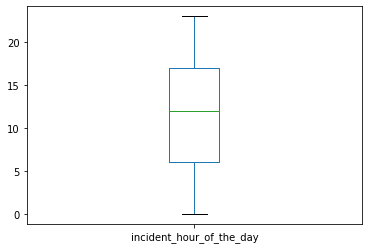

In [95]:
df['incident_hour_of_the_day'].plot.box()

<AxesSubplot:>

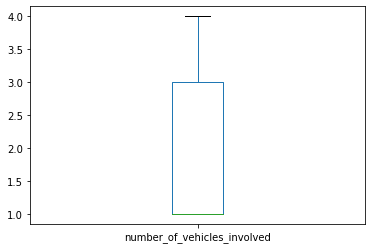

In [96]:
df['number_of_vehicles_involved'].plot.box()

<AxesSubplot:>

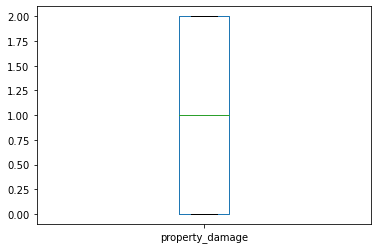

In [97]:
df['property_damage'].plot.box()

<AxesSubplot:>

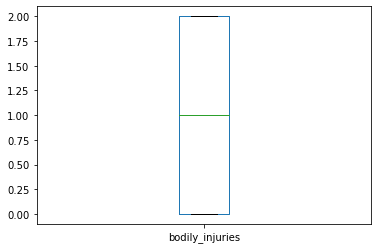

In [98]:
df['bodily_injuries'].plot.box()

<AxesSubplot:>

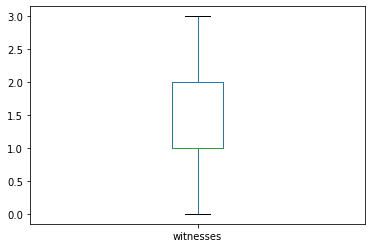

In [99]:
df['witnesses'].plot.box()

<AxesSubplot:>

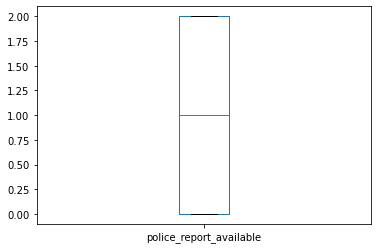

In [100]:
df['police_report_available'].plot.box()

<AxesSubplot:>

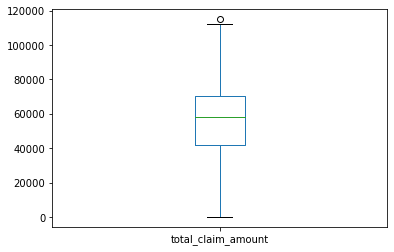

In [101]:
df['total_claim_amount'].plot.box()

<AxesSubplot:>

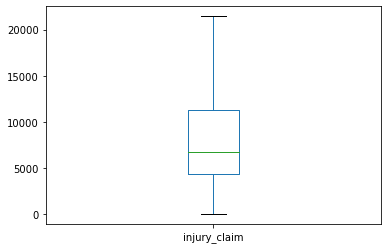

In [102]:
df['injury_claim'].plot.box()

<AxesSubplot:>

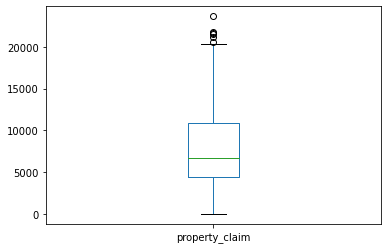

In [103]:
df['property_claim'].plot.box()

<AxesSubplot:>

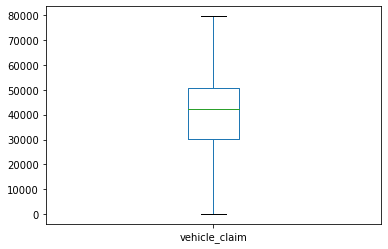

In [104]:
df['vehicle_claim'].plot.box()

<AxesSubplot:>

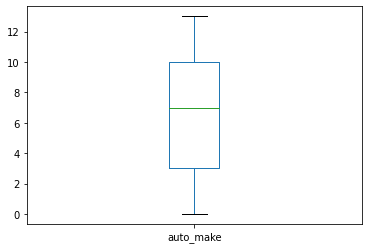

In [105]:
df['auto_make'].plot.box()

<AxesSubplot:>

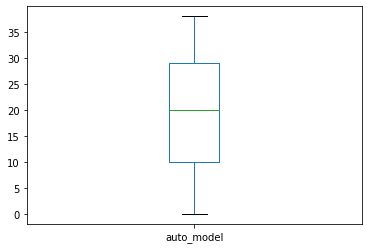

In [106]:
df['auto_model'].plot.box()

<AxesSubplot:>

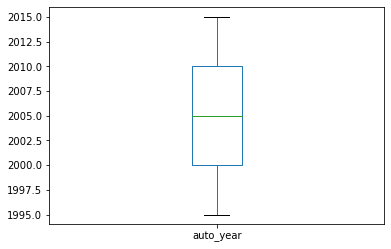

In [107]:
df['auto_year'].plot.box()

<AxesSubplot:>

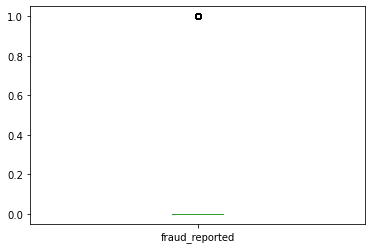

In [108]:
df['fraud_reported'].plot.box()

# Considering the outlier removal

In [145]:
from scipy.stats import zscore
import numpy as np

In [146]:
z=np.abs(zscore(df))
df.shape

(1000, 39)

In [147]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8], dtype=int64))


In [148]:
len(np.where(z>3)[0])

20

In [149]:
df_new=df[(z<3)]
df_new

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,456,60,556080,359.0,2.0,1.0,1000,766.19,0,612260,...,3,0.0,5060,460,920,3680,8.0,12.0,2007,0.0
999,456,60,556080,359.0,2.0,1.0,1000,766.19,0,612260,...,3,0.0,5060,460,920,3680,8.0,12.0,2007,0.0
999,456,60,556080,359.0,2.0,1.0,1000,766.19,0,612260,...,3,0.0,5060,460,920,3680,8.0,12.0,2007,0.0
999,456,60,556080,359.0,2.0,1.0,1000,766.19,0,612260,...,3,0.0,5060,460,920,3680,8.0,12.0,2007,0.0


In [150]:
df_new.shape

(38980, 39)

In [151]:
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe", df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows", df.shape[0]-df_new.shape[0])

Old Dataframe (1000, 39)
New Dataframe (980, 39)
total_dropped_rows 20


In [152]:
loss_percent=(1000-980)/1000*100
loss_percent

2.0

# Separating the columns into features and target:

In [153]:
features=df_new.drop("fraud_reported",axis=1)
target=df_new["fraud_reported"]

# Scaling the data using Min-Max Scaler:

In [154]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [155]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the testing accuracy is:- 0.1832331730040262
At random state 0, the testing accuracy is:- 0.179229690073743


At random state 1, the testing accuracy is:- 0.20635361860376855
At random state 1, the testing accuracy is:- 0.07256518858643801


At random state 2, the testing accuracy is:- 0.20350249436360046
At random state 2, the testing accuracy is:- 0.08912493661432286


At random state 3, the testing accuracy is:- 0.191217456721813
At random state 3, the testing accuracy is:- 0.1509649851715209


At random state 4, the testing accuracy is:- 0.20755638481540828
At random state 4, the testing accuracy is:- 0.07478283032934341


At random state 5, the testing accuracy is:- 0.1947417590722752
At random state 5, the testing accuracy is:- 0.1360603091464343


At random state 6, the testing accuracy is:- 0.1999640386604017
At random state 6, the testing accuracy is:- 0.10735796707895573


At random state 7, the testing accuracy is:- 0.20017860688213707
At random state 7, t

In [156]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [157]:
lr.fit(features_train,target_train)

LinearRegression()

In [158]:
pred_test=lr.predict(features_test)

In [159]:
print(r2_score(target_test,pred_test))

0.09047744123247436


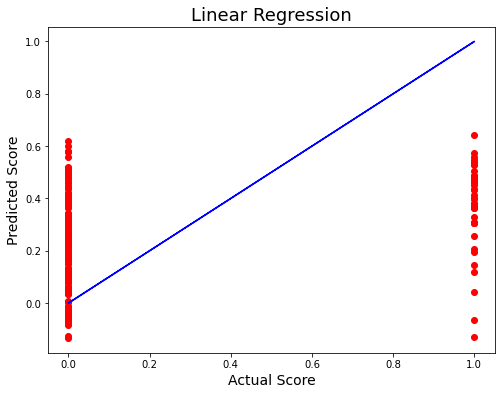

In [160]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test, color='b')
plt.xlabel('Actual Score',fontsize=14)
plt.ylabel('Predicted Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization:

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [162]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [163]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lssrf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('Cross val Score:',rfc*100)

R2 Score: 33.69962608299131
Cross val Score: 40.253385677836384


In [164]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.010181461284768068

# Ensemble technique:

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [166]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('Cross val Score:',rfc*100)

R2 Score: 32.572901656786726
Cross val Score: 39.84228601767909


# Model Selection

linear regression

In [167]:
X=df_new.iloc[:,1:14]
y=df_new['fraud_reported']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [168]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [169]:
pred=lr.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.3766142513114806
MSE: 0.19895814736505704
RMSE: 0.44604724790660577


# y_test vs predictions

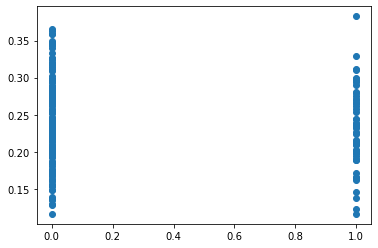

In [170]:
plt.scatter(x=y_test,y=pred)

# Decision Tree Regression Model

In [171]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

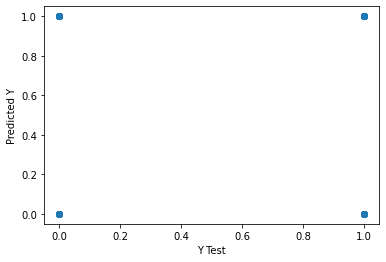

In [172]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [173]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.33163265306122447
MSE: 0.33163265306122447
RMSE: 0.5758755534498964


# Random Forest Regressor

In [174]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [175]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.3278061224489796
MSE: 0.17517806122448978
RMSE: 0.41854278302760134


<AxesSubplot:xlabel='fraud_reported', ylabel='Density'>

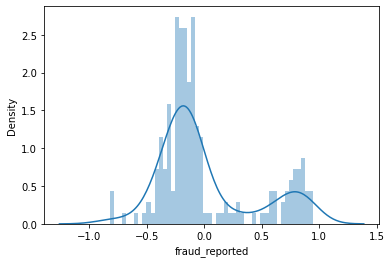

In [176]:
sns.distplot((y_test-pred),bins=50)

# Actual Vs Predicted sample

,Y Test,Pred
804,0.0,0.19
450,0.0,0.27
144,0.0,0.06
710,1.0,0.20
68,0.0,0.08


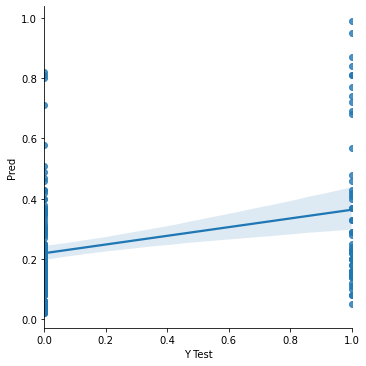

In [177]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Conclusions

learnt about EDA function through Pandas and other plotting libraries.

used matplotlib, plotly and seaborn to develop better insights about the data.

preproceesing helps in dealing with missing values and irregualities present in the data.

Analyzed which model will be work with better accuracy with the help of low residual and RMSE scores.

used Linear, Decision Tree and other applicable and required models to get best predictions.